<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data
<br><br>
_Instructor:_ Tim Book, General Assembly DC

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [107]:
movies = pd.read_csv('data/imdb_1000.csv', sep=',')

#### What are the number of rows and columns?

In [108]:
# Answer:

movies

#979 rows, 6 columns

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


#### What are the data types of each column?

In [109]:
# Answer:

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [110]:
# Answer:

movies.duration.describe()

#121 minutes

count    979.000000
mean     120.979571
std       26.218010
min       64.000000
25%      102.000000
50%      117.000000
75%      134.000000
max      242.000000
Name: duration, dtype: float64

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [111]:
# Answer:

movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

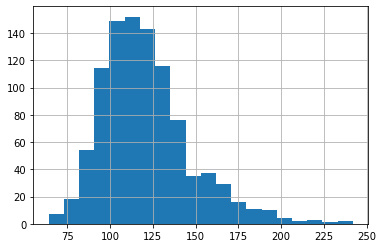

In [112]:
# Answer:

movies.duration.hist(bins=20);

#### Use a box plot to display that same data.

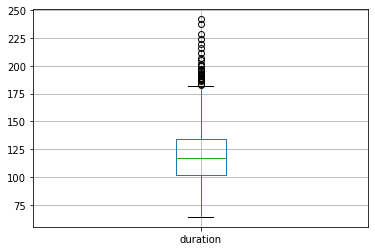

In [113]:
# Answer:

movies.boxplot(column='duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [114]:
# Answer:

movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 1.0, 'Ratings histogram')

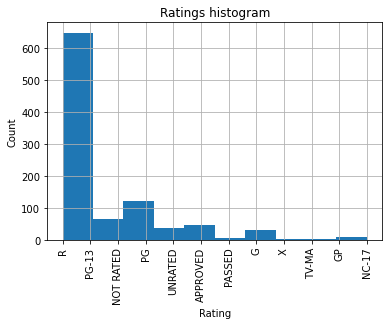

In [115]:
# Answer:

ratings_hist = movies.content_rating.hist()
plt.xticks(rotation='vertical')
ratings_hist.set_xlabel('Rating')
ratings_hist.set_ylabel('Count')
plt.title('Ratings histogram')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

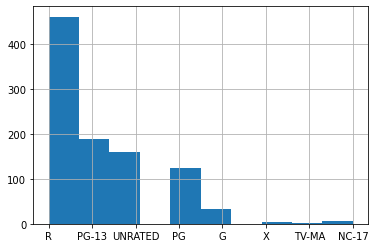

In [116]:
# Answer:

movies.content_rating.replace({'NOT RATED':'UNRATED','APPROVED':'UNRATED','PASSED':'UNRATED','GP':'UNRATED'}, inplace=True)

ratings_hist = movies.content_rating.hist()

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [117]:
movies.content_rating.replace({'X':'NC-17', 'TV-MA':'NC-17'}, inplace=True)

<AxesSubplot:>

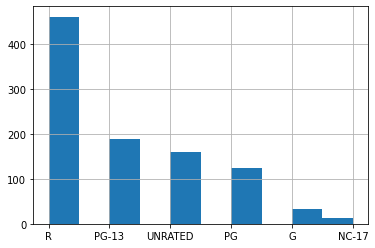

In [118]:
movies.content_rating.hist()

#### Count the number of missing values in each column.

In [119]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [120]:
# Answer:

movies.loc[movies.content_rating.isnull()]

movies.content_rating = movies.content_rating.fillna(0)

In [121]:
movies.loc[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [122]:
# Answer: 
print(movies[movies.duration >= 120].describe()['star_rating']['mean'])

#avg star rating >= 120 mins: 7.95

print(movies[movies.duration < 120].describe()['star_rating']['mean'])

#avg star rating < 120 mins: 7.84

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot:xlabel='duration', ylabel='star_rating'>

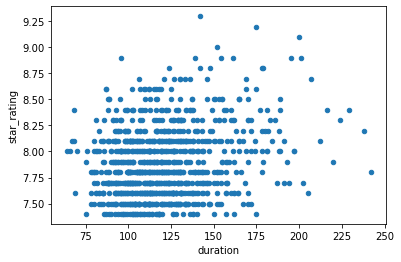

In [123]:
# Answer:

movies.plot.scatter(x='duration', y='star_rating')

#### Calculate the average duration for each genre.

In [124]:
# Answer:
movies.duration.groupby(movies.genre).mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

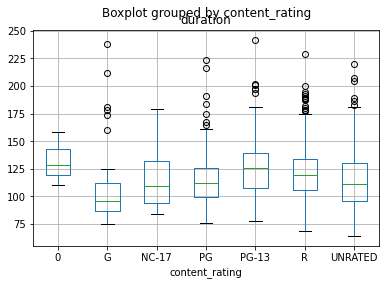

In [125]:
# Answer:

movies.boxplot(column='duration', by='content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [126]:
# Answer:

movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].first()

<ipython-input-126-465bc4917166>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  movies.sort_values('star_rating', ascending=False).groupby('genre')['title','star_rating'].first()


,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Modern Times,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [127]:
# Answer:

dupe_df = movies[movies.title.duplicated() == True]

movies[movies.title.isin(dupe_df.title)]

#These values are not duplicates, they have different actors, ratings, and durations.

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,0,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: automatically create a list of relevant genres by saving the value_counts and then filtering

In [128]:
# Answer:

#movies.duration.groupby(movies.genre).mean()
genres = movies.genre.value_counts() > 10

movies.groupby(movies.genre)['star_rating'].mean()[genres]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: aggregate by count and mean, then filter using the count

## Bonus

#### Figure out something "interesting" using the actors data!

In [129]:
new_actors_list = []

for cast in movies.actors_list:
    cast_list = cast.split(',')
    new_actors_list.append(cast_list)

movies.actors_list = new_actors_list

clean_actors_list = [[actor.strip('[]') for actor in cast] for cast in movies.actors_list]

clean_actors_list = [[actor.replace('u\'', '') for actor in cast] for cast in clean_actors_list]

In [156]:
movies.actors_list = clean_actors_list

In [166]:
big_actors_list = []

for cast in clean_actors_list:
    for actor in cast:
        big_actors_list.append(actor)

In [178]:
actor_dict = {actor:big_actors_list.count(actor) for actor in big_actors_list}

max(actor_dict, key=actor_dict.get)

actor_dict['Robert De Niro']

# De Niro is the most popular actor in the database

# I would like to figure out how to do this inside the dataframe so that I can see,
# for instance, if there are genres that cycle the same actors a lot

13